In [6]:
import os
os.chdir('C:/Users/mamun/OneDrive/Desktop/Data_science_project/ML Zoomcamp')

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [9]:
df=pd.read_csv("raw.githubusercontent.com_alexeygrigorev_mlbookcamp-code_master_chapter-02-car-price_data.csv")

In [10]:
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Preparation 
Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg,
MSRP 
* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
* Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1



In [11]:
# Select only the columns we want to keep
selected_columns = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG',
    'city mpg', 'MSRP'
]
df = df[selected_columns]

# Lowercase column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Fill missing values with 0
df.fillna(0, inplace=True)

In [12]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [13]:
# Calculate the average price
msrp_mean = df['msrp'].mean()
# Create a new column 'above_average' with 1 if 'price' is above the average, 0 otherwise
df['above_average'] = np.where(df['msrp']>msrp_mean,1,0)

In [14]:
print(df.columns)

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp',
       'above_average'],
      dtype='object')


In [15]:
df['above_average'].value_counts()


above_average
0    8645
1    3269
Name: count, dtype: int64

### Splitting data

In [16]:
#Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution.
#Use train_test_split function for that with random_state=1

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
len(df_train),len(df_val),len(df_test),len(y_train),len(y_val),len(y_test)


(7148, 2383, 2383, 7148, 2383, 2383)

### Question 1 :ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.
Let's do that
For each numerical variable, use it as score and compute AUC with the above_average variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])
 with the
AUC can go below 0.5 if the variable is negatively correlated target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

1.engine_hp
2.engine_cylinders
3.highway_mpg
4.city_mpg

In [93]:
len(X_train),len(y_train)

(7148, 7148)

In [17]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model','transmission_type', 'vehicle_style']

In [18]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



# Initialize a dictionary to store the AUC values for each variable
auc_scores = {}

# Calculate AUC for each numerical variable
for variable in numerical:
    auc = roc_auc_score(y_train, df_train[variable])
    
    # Check if AUC is < 0.5 and invert the variable if necessary
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[variable])
    
    auc_scores[variable] = auc

# Find the numerical variable with the highest AUC
highest_auc_variable = max(auc_scores, key=auc_scores.get)
highest_auc_value = auc_scores[highest_auc_variable]

print("AUC Scores:")
for variable, auc in auc_scores.items():
    print(f"{variable}: {auc}")

print(f"The numerical variable with the highest AUC is {highest_auc_variable} with AUC = {highest_auc_value}")


AUC Scores:
year: 0.687551492804683
engine_hp: 0.9171031265539011
engine_cylinders: 0.766116490165669
highway_mpg: 0.6330587871772013
city_mpg: 0.6734244643245233
The numerical variable with the highest AUC is engine_hp with AUC = 0.9171031265539011


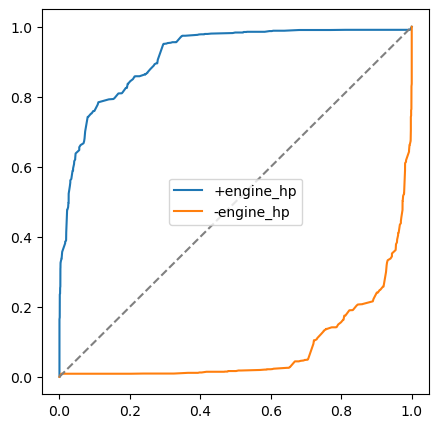

In [19]:
#@ PLOTTING THE ROC CURVE:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label='+engine_hp')

fpr, tpr, _ = roc_curve(y_train, -df_train.engine_hp)
plt.plot(fpr, tpr, label='-engine_hp')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

### Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [34]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

#Apply one-hot-encoding using DictVectorizer

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)
#train the logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = model.predict_proba(X_val)[:, 1]


In [67]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [68]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
  
y_pred = model.predict_proba(X_val)[:, 1]
above_average = (y_pred >= 0.5)
(y_val == above_average).mean()
# y_pred = model.predict(X_val)
# print(round(metrics.accuracy_score(y_val, y_pred),3))

# ROC AUC SCORE:
roc_auc = roc_auc_score(y_val, y_pred).round(3)
roc_auc

0.98

### Question 3: Precision and Recall
* Now let's compute precision and recall for our model.
* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [76]:
#for calculating precision & recall we have to calculate confusion matrix

def confusion_matrix(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [77]:
# IMPLEMENTATION OF FUNCTION:
df_scores = confusion_matrix(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,644,329,10,1400
20,0.2,626,205,28,1524
30,0.3,608,143,46,1586
40,0.4,595,89,59,1640
50,0.5,576,69,78,1660
60,0.6,549,46,105,1683
70,0.7,504,26,150,1703
80,0.8,454,12,200,1717
90,0.9,367,3,287,1726


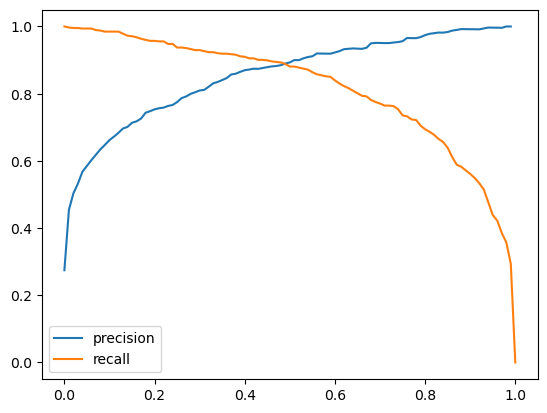

In [78]:
# ADDING THE COLUMNS:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
# INSPECTING THE CURVES:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.legend()
plt.show()

### Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. 
That's why they are often combined into the F1 score - a metrics that takes into account both
This is the formula for computing 
F1 = 2 * P * R / (P + R)
Where 
 P is precision and 
 R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

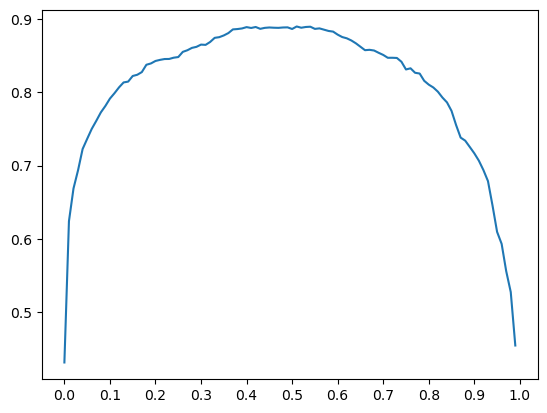

In [79]:
#F1 SCORES:
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)
# INSPECTING F1 SCORE:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

### Question 5: 5-Fold CV
* Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
* KFold(n_splits=5, shuffle=True, random_state=1)
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

In [85]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
dv, model = train(df_train, y_train, C=0.001)
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
y_pred = predict(df_val, dv, model)

In [86]:
from sklearn.model_selection import KFold

!pip install tqdm

In [87]:
from tqdm.auto import tqdm

In [99]:
kf = KFold(n_splits=5, shuffle=True, random_state=2)
auc_scores = []
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

dv = DictVectorizer(sparse=False)
for train_idx, val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
print("Standard Deviation of AUC Scores:", np.std(scores))



Standard Deviation of AUC Scores: 0.003210372119615055


In [ ]:
### Question 6: Hyperparemeter Tuning
* Now let's use 5-Fold cross-validation to find the best parameter C
* Iterate over the following C values: [0.01, 0.1, 0.5, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.01
0.1
0.5
10
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [107]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# Define the values of C to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize K-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Create an empty list to store the results
results = []

# Iterate over different values of C
for C in tqdm(C_values):
    # Initialize an empty list to store cross-validation scores for this C
    cv_scores = []
    
    # Create a logistic regression model with the specified C
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    
    # Perform cross-validation for each fold
    for train_idx, val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        
        # Train the model on the training data
        dv, model = train(df_train, y_train, C=C)
        
        # Make predictions on the validation data
        y_pred = predict(df_val, dv, model)
        
        # Calculate AUC for this fold
        auc = roc_auc_score(y_val, y_pred)
        
        # Store the AUC score in the list of cross-validation scores
        cv_scores.append(auc)
    
    # Calculate the mean and standard deviation of the cross-validation scores
    mean_score = round(np.mean(cv_scores), 3)
    std_dev = round(np.std(cv_scores), 3)
    
    # Store the results for this C value
    results.append((C, mean_score, std_dev))

# Find the C value with the best mean score
best_C = max(results, key=lambda x: x[1])

print("C values and their corresponding mean scores and standard deviations:")
for C, mean, std in results:
    print(f"C={C}: Mean={mean}, Std Dev={std}")

print(f"The best C value is C={best_C[0]} with a mean score of {best_C[1]}")


100%|██████████| 4/4 [00:05<00:00,  1.42s/it]

C values and their corresponding mean scores and standard deviations:
C=0.01: Mean=0.976, Std Dev=0.004
C=0.1: Mean=0.976, Std Dev=0.004
C=0.5: Mean=0.976, Std Dev=0.004
C=10: Mean=0.976, Std Dev=0.004
The best C value is C=0.01 with a mean score of 0.976
